In [ ]:
import matplotlib.pyplot as plt, seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import math
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

%matplotlib inline

In [ ]:
!pip install dtreeviz
!apt-get install graphviz
from dtreeviz.trees import dtreeviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 61 kB 189 kB/s 
  Created wheel for dtreeviz: filename=dtreeviz-1.3.6-py3-none-any.whl size=67326 sha256=4969f25103ad7eb9dd74ec3b016f50cdb5210f03ad158e6eccaffdcb3c5a38b7
  Stored in directory: /root/.cache/pip/wheels/33/76/fe/99227ff871766e7284bb88d3d28e2f4886b8ec04d669033478
Successfully built dtreeviz
Reading package lists... Done
Building dependency tree       
Reading state information... Done
graphviz is already the newest version (2.40.1-2).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


In [ ]:
from google.colab import drive
import pandas as pd
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df=pd.read_excel('/content/drive/My Drive/220617_ai_crawling_3Y_Music_maskrcnn_hsv_view_per.xlsx')
pd.set_option('display.max_colwidth',1)
pd.set_option('display.max_rows', 20)
pd.set_option('display.width', 50)
df = pd.DataFrame(df)

In [ ]:
df.head()

,Unnamed: 0,no,video_id,thumbnail,object_id0,object_w0,object_h0,object_wh0,object_id1,object_w1,...,object_h79,object_wh79,object_id80,object_w80,object_h80,object_wh80,H,S,V,view_per_day
0,0,0,Kd2p_dEG-5U,https://i.ytimg.com/vi/Kd2p_dEG-5U/mqdefault.jpg,0,0,0,NaN,2,204,...,0,NaN,0,0,0,NaN,67.98,74.10,40.81,45206.77
1,1,1,uWW1V_-jC6k,https://i.ytimg.com/vi/uWW1V_-jC6k/mqdefault.jpg,0,0,0,NaN,2,250,...,0,NaN,0,0,0,NaN,33.04,114.01,127.18,18647.08
2,2,2,QOiRhDTCPc0,https://i.ytimg.com/vi/QOiRhDTCPc0/mqdefault.jpg,0,0,0,NaN,1,183,...,0,NaN,0,0,0,NaN,44.24,88.19,165.37,43163.71
3,3,3,pTk0-LKwbuU,https://i.ytimg.com/vi/pTk0-LKwbuU/mqdefault.jpg,0,0,0,NaN,2,290,...,0,NaN,0,0,0,NaN,113.48,77.01,92.82,32995.93
4,4,4,sXhJWCJE-5k,https://i.ytimg.com/vi/sXhJWCJE-5k/mqdefault.jpg,0,0,0,NaN,2,154,...,0,NaN,0,0,0,NaN,90.82,231.00,70.42,31853.29


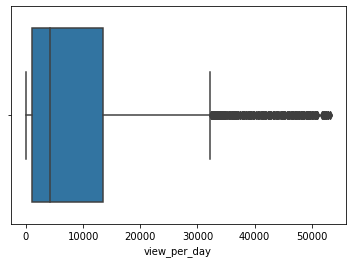

In [ ]:
#구간별로 클래스를 분할할 view_per_day 시각화

sns.boxplot(x = df['view_per_day'])

(array([2609.,  711.,  454.,  323.,  203.,  149.,  125.,   80.,   74.,
          74.]),
 array([1.4000000e-01, 5.3222640e+03, 1.0644388e+04, 1.5966512e+04,
        2.1288636e+04, 2.6610760e+04, 3.1932884e+04, 3.7255008e+04,
        4.2577132e+04, 4.7899256e+04, 5.3221380e+04]),
 <a list of 10 Patch objects>)

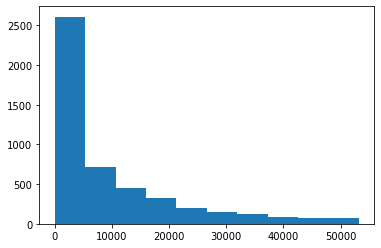

In [ ]:
#구간별로 클래스를 분할할 view_per_day 시각화

plt.hist(x = df['view_per_day'])

In [ ]:
#view_per_day를 동일한 개수로 3분할

df['view_class'] = pd.qcut(df['view_per_day'], 3, labels=['1', '2', '3'])

In [ ]:
df[['view_per_day', 'view_class']].head()

,view_per_day,view_class
0,45206.77,3
1,18647.08,3
2,43163.71,3
3,32995.93,3
4,31853.29,3


In [ ]:
df

,Unnamed: 0,no,video_id,thumbnail,object_id0,object_w0,object_h0,object_wh0,object_id1,object_w1,...,object_wh79,object_id80,object_w80,object_h80,object_wh80,H,S,V,view_per_day,view_class
0,0,0,Kd2p_dEG-5U,https://i.ytimg.com/vi/Kd2p_dEG-5U/mqdefault.jpg,0,0,0,NaN,2,204,...,NaN,0,0,0,NaN,67.98,74.10,40.81,45206.77,3
1,1,1,uWW1V_-jC6k,https://i.ytimg.com/vi/uWW1V_-jC6k/mqdefault.jpg,0,0,0,NaN,2,250,...,NaN,0,0,0,NaN,33.04,114.01,127.18,18647.08,3
2,2,2,QOiRhDTCPc0,https://i.ytimg.com/vi/QOiRhDTCPc0/mqdefault.jpg,0,0,0,NaN,1,183,...,NaN,0,0,0,NaN,44.24,88.19,165.37,43163.71,3
3,3,3,pTk0-LKwbuU,https://i.ytimg.com/vi/pTk0-LKwbuU/mqdefault.jpg,0,0,0,NaN,2,290,...,NaN,0,0,0,NaN,113.48,77.01,92.82,32995.93,3
4,4,4,sXhJWCJE-5k,https://i.ytimg.com/vi/sXhJWCJE-5k/mqdefault.jpg,0,0,0,NaN,2,154,...,NaN,0,0,0,NaN,90.82,231.00,70.42,31853.29,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4797,4797,4914,87aJyyoAREs,https://i.ytimg.com/vi/87aJyyoAREs/mqdefault.jpg,0,0,0,NaN,0,0,...,NaN,0,0,0,NaN,198.66,154.17,104.38,74.00,1
4798,4798,4915,iXBf921CCBs,https://i.ytimg.com/vi/iXBf921CCBs/mqdefault.jpg,0,0,0,NaN,1,168,...,NaN,0,0,0,NaN,137.86,51.27,150.28,123.27,1
4799,4799,4916,625-jjwRdfw,https://i.ytimg.com/vi/625-jjwRdfw/mqdefault.jpg,0,0,0,NaN,2,22,...,NaN,0,0,0,NaN,84.64,61.70,127.64,176.46,1
4800,4800,4917,3pHeiWQezg4,https://i.ytimg.com/vi/3pHeiWQezg4/mqdefault.jpg,0,0,0,NaN,12,330,...,NaN,0,0,0,NaN,132.04,47.53,148.61,13633.19,3


In [ ]:
df.to_excel('/content/drive/My Drive/music_to_split.xlsx')

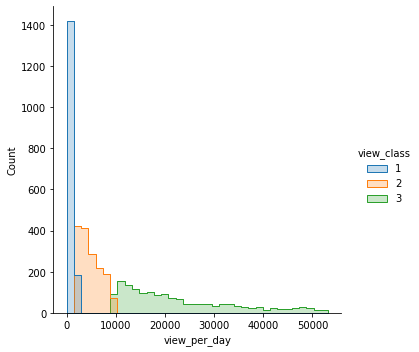

In [ ]:
#분할 후 view_per_day 시각화

sns.displot(df, x='view_per_day', hue='view_class', element='step')

In [ ]:
#피쳐로 사용할 열을 제외한 나머지 drop, nan을 0으로 치환

X_df = df.drop(columns=['view_per_day', 'view_class'], axis=1)
X_df = X_df.drop(X_df.columns[0:4], axis=1)
X_df = X_df.fillna(0)
X_df

,object_id0,object_w0,object_h0,object_wh0,object_id1,object_w1,object_h1,object_wh1,object_id2,object_w2,...,object_w79,object_h79,object_wh79,object_id80,object_w80,object_h80,object_wh80,H,S,V
0,0,0,0,0.0,2,204,162,8702.000000,0,0,...,0,0,0.0,0,0,0,0.0,67.98,74.10,40.81
1,0,0,0,0.0,2,250,313,19571.000000,0,0,...,0,0,0.0,0,0,0,0.0,33.04,114.01,127.18
2,0,0,0,0.0,1,183,154,28182.000000,0,0,...,0,0,0.0,0,0,0,0.0,44.24,88.19,165.37
3,0,0,0,0.0,2,290,302,21931.000000,0,0,...,0,0,0.0,0,0,0,0.0,113.48,77.01,92.82
4,0,0,0,0.0,2,154,225,9603.000000,0,0,...,0,0,0.0,0,0,0,0.0,90.82,231.00,70.42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4797,0,0,0,0.0,0,0,0,0.000000,0,0,...,0,0,0.0,0,0,0,0.0,198.66,154.17,104.38
4798,0,0,0,0.0,1,168,179,30072.000000,0,0,...,0,0,0.0,0,0,0,0.0,137.86,51.27,150.28
4799,0,0,0,0.0,2,22,49,279.500000,0,0,...,0,0,0.0,0,0,0,0.0,84.64,61.70,127.64
4800,0,0,0,0.0,12,330,750,2161.166667,0,0,...,0,0,0.0,0,0,0,0.0,132.04,47.53,148.61


In [ ]:
# X에 각 피쳐 맵핑
X = X_df
# y에 view맵핑
y = df['view_class']

In [ ]:
X.head()

,object_id0,object_w0,object_h0,object_wh0,object_id1,object_w1,object_h1,object_wh1,object_id2,object_w2,...,object_w79,object_h79,object_wh79,object_id80,object_w80,object_h80,object_wh80,H,S,V
0,0,0,0,0.0,2,204,162,8702.0,0,0,...,0,0,0.0,0,0,0,0.0,67.98,74.10,40.81
1,0,0,0,0.0,2,250,313,19571.0,0,0,...,0,0,0.0,0,0,0,0.0,33.04,114.01,127.18
2,0,0,0,0.0,1,183,154,28182.0,0,0,...,0,0,0.0,0,0,0,0.0,44.24,88.19,165.37
3,0,0,0,0.0,2,290,302,21931.0,0,0,...,0,0,0.0,0,0,0,0.0,113.48,77.01,92.82
4,0,0,0,0.0,2,154,225,9603.0,0,0,...,0,0,0.0,0,0,0,0.0,90.82,231.00,70.42


In [ ]:
y.head()

0    3
1    3
2    3
3    3
4    3
Name: view_class, dtype: category
Categories (3, object): ['1' < '2' < '3']

In [ ]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
X_train.shape, X_test.shape

((3361, 327), (1441, 327))

In [ ]:
params = {
'n_estimators' : [100, 200, 300, 400, 500],
'max_depth' : [4, 6, 8, 10, 12],
'min_samples_leaf': [8, 12, 18],
'min_samples_split' : [8, 16, 20] }


In [ ]:
#GridSearchCV를 사용하여 RF 최적의 파라미터 찾기
classifier_rf = RandomForestClassifier()
grid_cv = GridSearchCV(classifier_rf,param_grid=params, cv = 10, n_jobs=-1)

NameError: ignored

In [ ]:
grid_cv.fit(X_train, y_train)

NameError: ignored

In [ ]:
print('최적 하이퍼 파라미터:', grid_cv.best_params_)
print('최적 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

최적 하이퍼 파라미터: {'max_depth': 12, 'min_samples_leaf': 12, 'min_samples_split': 16, 'n_estimators': 100}
최적 예측 정확도: 0.4133


In [ ]:
#최적 파라미터를 적용하여 모델 학습

classifier_rf = RandomForestClassifier(random_state=0, max_depth = 12, min_samples_leaf = 12, min_samples_split= 16, n_estimators = 100 ,n_jobs=-1)
classifier_rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=12, min_samples_leaf=12, min_samples_split=16,
                       n_jobs=-1, random_state=0)

In [ ]:
y_pred = classifier_rf.predict(X_test)
y_pred

array(['1', '1', '1', ..., '1', '1', '1'], dtype=object)

In [ ]:
#모델 성능 측정

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.45      0.51      0.48       505
           2       0.41      0.23      0.29       474
           3       0.42      0.56      0.48       462

    accuracy                           0.43      1441
   macro avg       0.43      0.43      0.42      1441
weighted avg       0.43      0.43      0.42      1441



In [ ]:
#모델 성능 측정

print('예측 정확도: {:.4f}'.format(accuracy_score(y_test,y_pred)))

예측 정확도: 0.4323


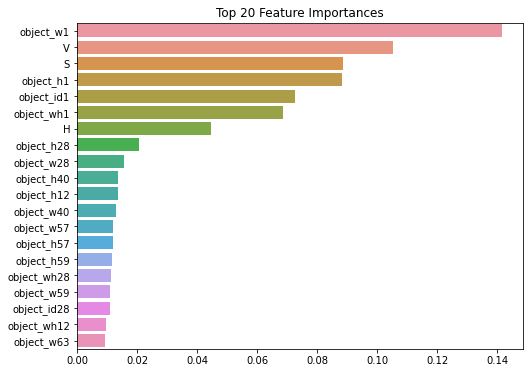

In [ ]:
#중요도 시각화

ftr_importances_values = classifier_rf.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index=X_train.columns)
ftr_top = ftr_importances.sort_values(ascending=False)[:20]
 
plt.figure(figsize=(8, 6))
plt.title('Top 20 Feature Importances')
sns.barplot(x=ftr_top, y=ftr_top.index)
plt.show()

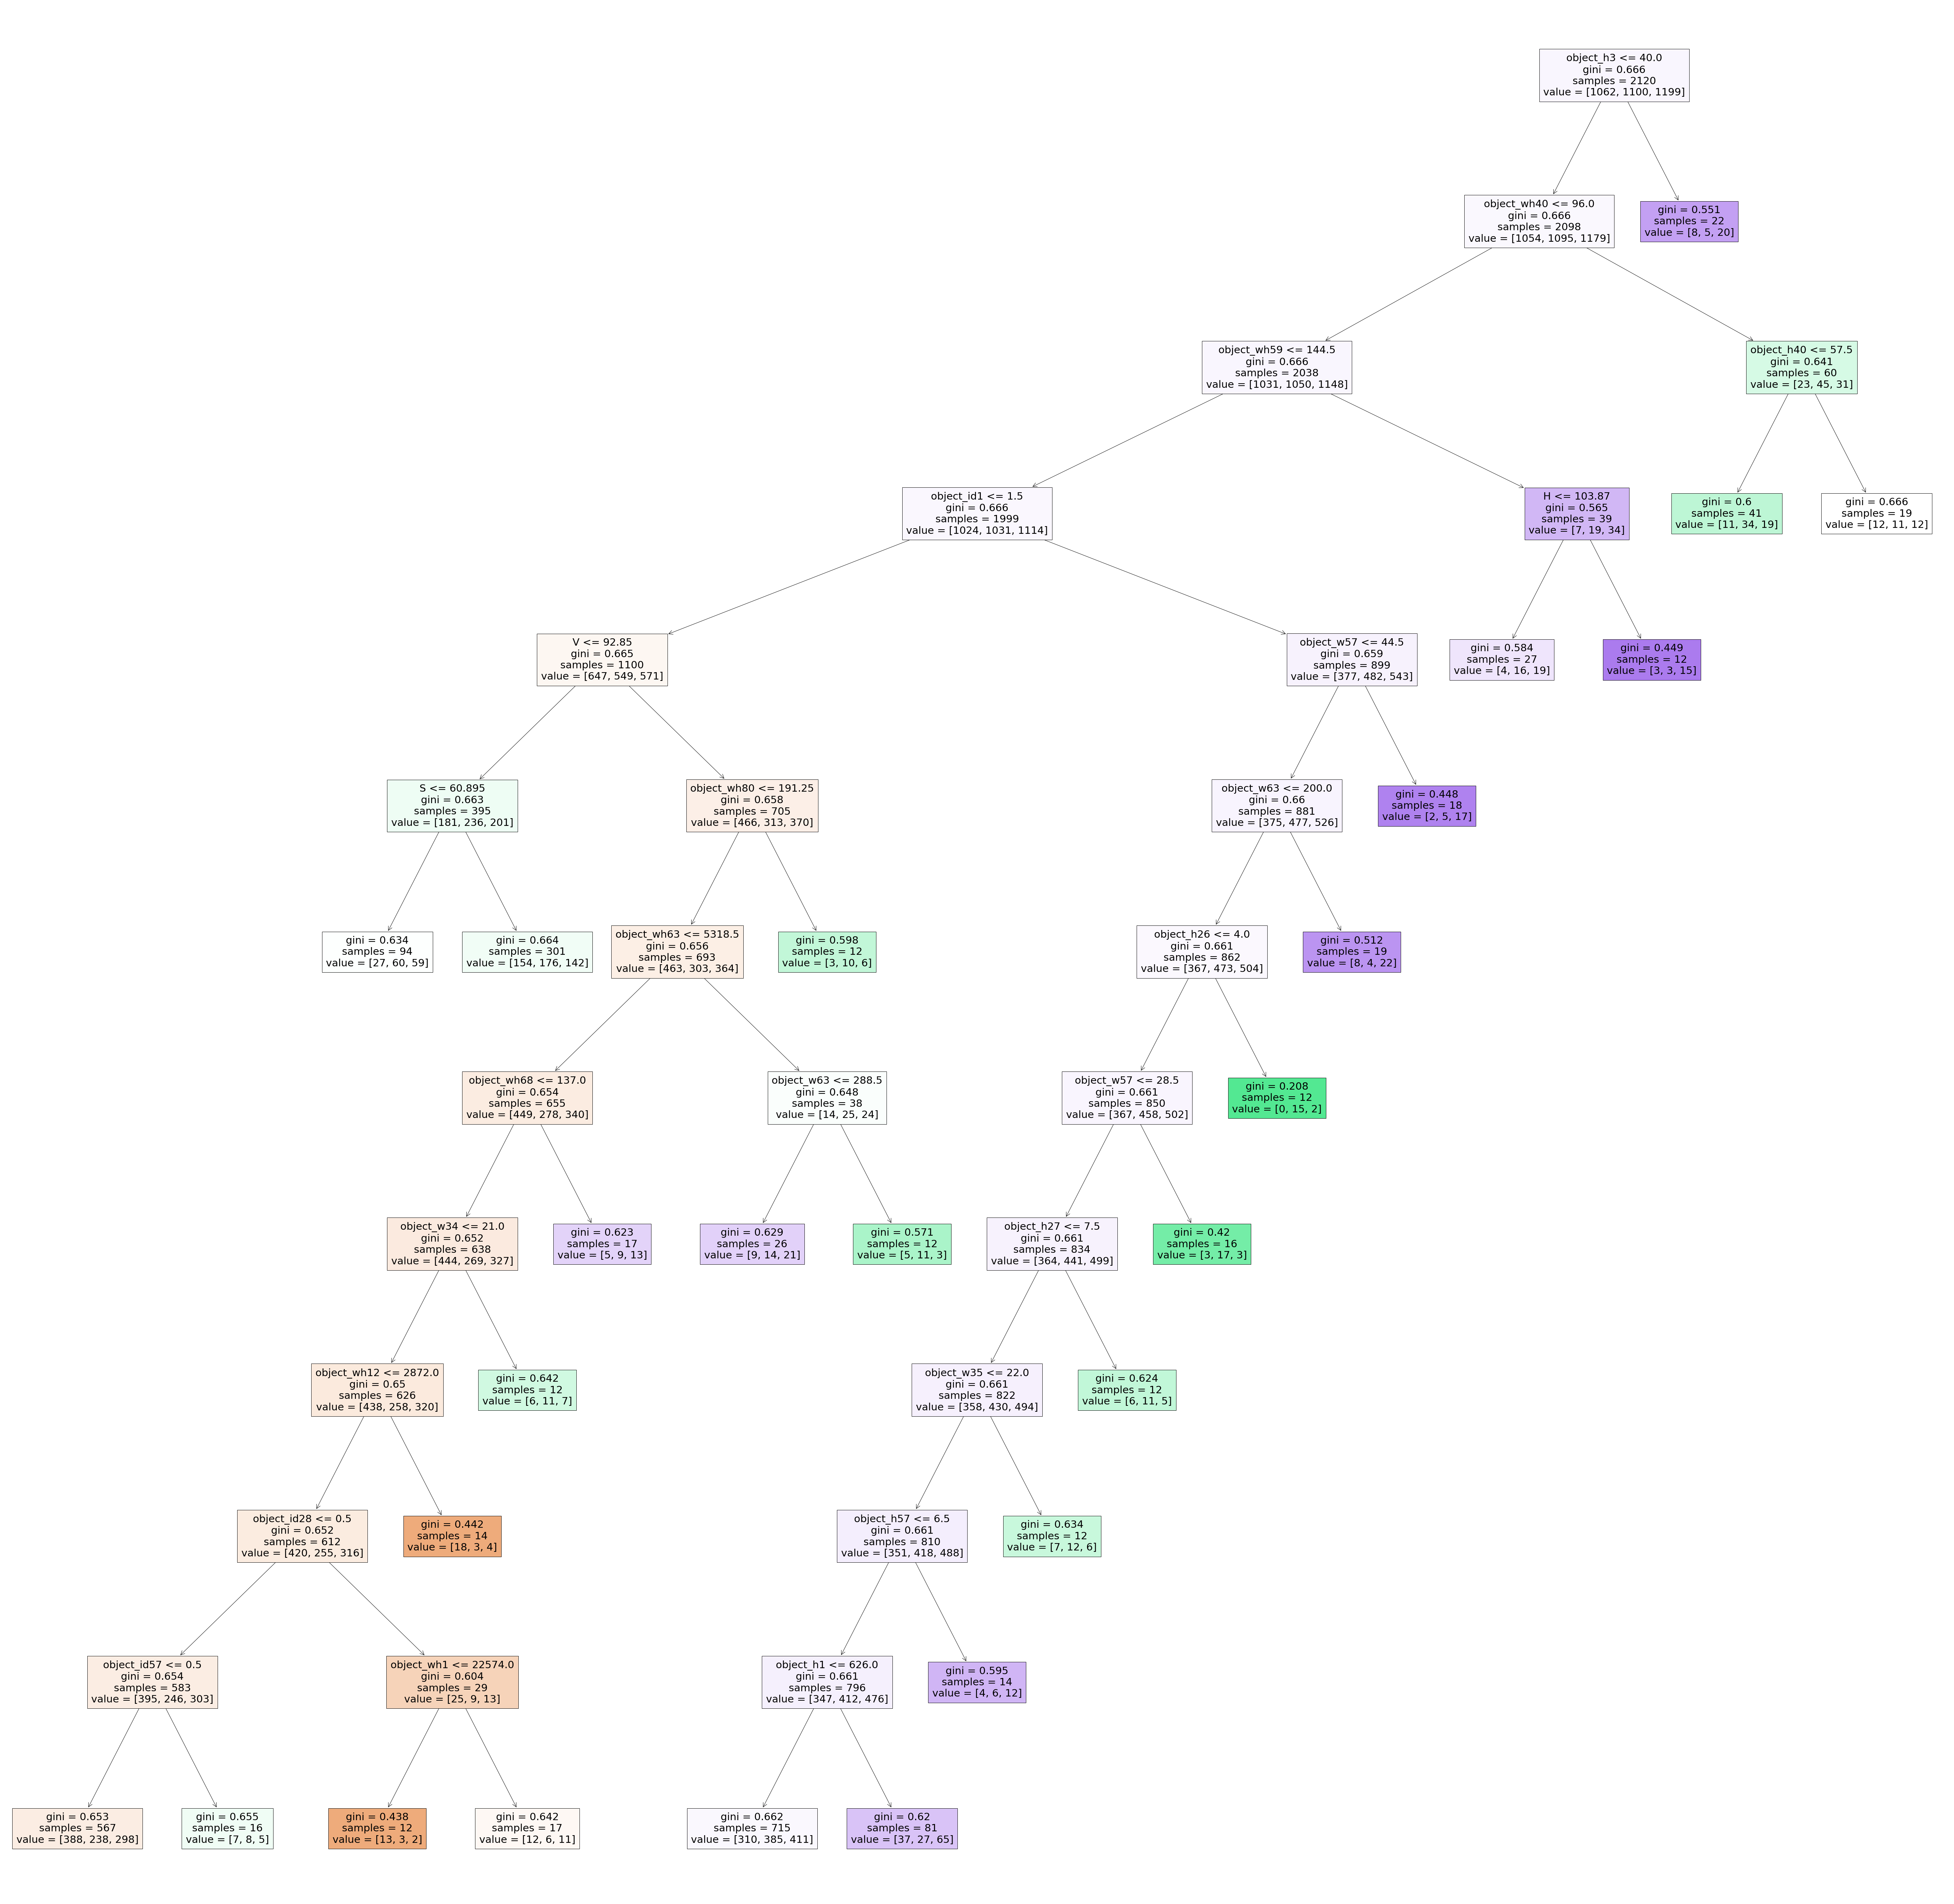

In [ ]:
#랜덤포레스트 트리 시각화

from sklearn import tree
plt.figure(figsize=(100,100))
_ = tree.plot_tree(classifier_rf.estimators_[0], feature_names=X_train.columns, filled=True)